# Introduction to Data Science – Homework 6
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, Feburary 28 2025, 11:59pm.

In Part 1 of this homework you will scrape github repositories and organize the information in a Pandas dataframe. In Part 2, you will use linear regression to gain meaningful insights. 

## Your Data
First Name: Carter
<br>
Last Name: Hardy
<br>
E-mail: carter.n.hardy@utah.edu
<br>
UID: u1538956
<br>

In [1]:
# imports and setup 
from bs4 import BeautifulSoup

import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 
# where the data is stored
DATA_PATH = "snapshots"

### 1. Scrape Github Repository List using BeautifulSoup
In this part you will explore Github repositories, specifically the 100 most-starred repositories. You are going to scrape data from a snapshot of [this repository list](https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories).

### 1.1. Check whether you are permitted to scrape the data
Before you start to scrape any website you should go through the terms of service and policy documents of the website. Almost all websites post conditions to use their data. Check the terms of [https://github.com/](https://github.com/) (see the tiny "terms" link at the bottom of the page) to see whether the site permits you to scrape their data or not. Are you sure you are allowed to scrape?

**Your solution:**  
The github terms of service has a section on API terms, located in section h of the terms of service. You agree to these terms when using any of Githubs APIs. We are essentially promising not to abuse the use of the API, share the API token to exceed Githubs limitation, we can't use the API to download data to spam or sell other's information.  

Under section c of the terms and service, Acceptable use, there is a link to githubs acceptable use policy. In section 7, titled information usage restrictions, it defines web scraping for us and states that we can't use information from the service, whether from scraping or an API to spam or sell people's information.  

Based on these definitions and terms of service, I believe we are permitted to scape data from github, as long as we are not violating the terms of service and using them data in an acceptable way defined by Github.

Reference solution: The [terms of service](https://help.github.com/articles/github-terms-of-service/) do not mention scraping, but the [help pages on the site policy](https://help.github.com/en/github/site-policy/github-acceptable-use-policies#5-scraping-and-api-usage-restrictionsyou) allows scraping. You can scrape Github under the following conditions:

- Researchers may scrape public, non-personal information from GitHub for research purposes, only if any publications resulting from that research are open access.
- Archivists may scrape GitHub for public data for archival purposes.
- You may not scrape GitHub for spamming purposes, including for the purposes of selling GitHub users' personal information, such as to recruiters, headhunters, and job boards.

The [robots.txt](https://github.com/robots.txt) is a little less explicit about what is allowed and what not, but overall, since we are scraping Github pages for education/research purposes and not publishing the results, it is reasonable to assume that this is ok to do.

### Task 1.2 Load the Data

To avoid any problems with GitHub blocking us from downloading the data many times, we have downloaded and saved a snapshot of the html files for you in the [data](data) folder. Note that the data folder is not completely consistent with what you see on the web – we've made a few patches to the data that makes your task here easier and this data represents a snapshot in time. You will be treating the data folder as your website to be scraped. The path to data folder is stored in `DATA_PATH` variable.

In the data folder you will find first 10 pages of highly starred repositories saved as `searchPage1.html`,`searchPage2.html`,`searchPage3.html` ... `searchPage10.html`

Check out page 5 if you want to see what happens if you scrape too quickly 😉. **Tip**: you should skip page 5.

Now read these html files in python and create a soup object. This is a two step process:
 * Read the text in the html files
 * Create the soup from the files that you've read. 

In [2]:
## Your code goes here
html_content = ""
for i in range(1,11):
    if i == 5:
        continue 
    file_path = f"{DATA_PATH}/search_page_{i}.html" 
    
    with open(file_path, "r", encoding="utf-8") as f:
        html_content += f.read()

In [3]:
# Creating the soup
## Your code goes here
soup = BeautifulSoup(html_content, 'html.parser')

### Extracting Data

Extract the following data for each repository, and create a Pandas Dataframe with a row for each repository and a column for each of these datums. 

+ The name of the repository
+ The primary language (there are multiple or none, if multiple, use the first one, if none, use "none")
+ The number of watching
+ The number of stars
+ The number of forks
+ The number of issues
+ Number of commits
+ Number of pull requests, and

Here's an example for one repository, `freeCodeCamp/freeCodeCamp,` in our dataset: 
```python
{'name': 'freeCodeCamp',
'language': 'TypeScript',
'watching': '8500',
'stars': '410251',
'forks': '39007',
'issues': 168,
'commits': 37591,
'pull_requests':66
}
```
### Task 1.3 Extract repository URLs

If you look at the results of the 100 most-starred repositories [(this list)](https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories), you will notice that all the information we want to extract for each repository is not in that list. This information is in the repository’s individual web page, for example [996icu](https://github.com/996icu/996.ICU). 

Therefore, you will first have to extract links of each repository from the soup you scraped earlier. When you extract the link for the repository, it will be a path to the stored HTML page for the repository. You will use this path to read the file and extract the above information.

Refer to the scraping lecture for details on how to do this. We recommend you use the web inspector to identify the relevant structures.

Example of a link that you need to extract - 996icu/996.ICU.html

In [4]:
## Your code goes here
search_title = soup.select("div.search-title")

links = [i.select("a")[0].get("href") for i in search_title]

repo_list = []
for link in links:
    repo_list.append((link + ".html").replace("https://github.com/", ""))



In [5]:
repo_list

['freeCodeCamp/freeCodeCamp.html',
 'EbookFoundation/free-programming-books.html',
 'sindresorhus/awesome.html',
 'codecrafters-io/build-your-own-x.html',
 'public-apis/public-apis.html',
 'jwasham/coding-interview-university.html',
 'kamranahmedse/developer-roadmap.html',
 'donnemartin/system-design-primer.html',
 '996icu/996.ICU.html',
 'vinta/awesome-python.html',
 'facebook/react.html',
 'practical-tutorials/project-based-learning.html',
 'awesome-selfhosted/awesome-selfhosted.html',
 'vuejs/vue.html',
 'TheAlgorithms/Python.html',
 'trekhleb/javascript-algorithms.html',
 'tensorflow/tensorflow.html',
 'torvalds/linux.html',
 'getify/You-Dont-Know-JS.html',
 'CyC2018/CS-Notes.html',
 'ohmyzsh/ohmyzsh.html',
 'ossu/computer-science.html',
 'Significant-Gravitas/AutoGPT.html',
 'twbs/bootstrap.html',
 'flutter/flutter.html',
 'microsoft/vscode.html',
 'github/gitignore.html',
 'jackfrued/Python-100-Days.html',
 'trimstray/the-book-of-secret-knowledge.html',
 'jlevy/the-art-of-command

### Task 1.4 Extracting required information

Once you have extracted links for each repository, you can start parsing those HTML pages using BeautifulSoup and extract all the required information.

**Note**: There are few repositories which do not contain 'issues' field (such as 996icu/996.ICU.html). Therefore, write your code such that it handles this condition as well.

**Save the dataframe you created to a new file project_info.csv and include this in your submission.** This separate file will also be graded and is required to earn points.

You also need to make sure that you reformat all numerical columns to be integer data. You can do that either as you parse, or when you have a dataframe with strings.

Some repositories are missing in the collection, we have provided code to skip these cases, and similarly in the next frame to NOT inlclude the None numbers in the storage.

**Tips**: the exact value of stars and forks can be found on top right corner, with mouse hover over the value. E.g., hover over 410k, shows 410,246. For *watching*, the data is abbreviated, You need to manually convert it. For example, 8.5k should be converted to 8500.

In [6]:
from pathlib import Path

def extract_repository_details(url):
    row = []
    
    file_path = Path("snapshots") / url
    if file_path.exists():
        with file_path.open('r', encoding="utf8") as f:
            file = f.read()
            
    ## Your code goes here
    try:
        soup = BeautifulSoup(file, "html.parser")
    except Exception as e:
        print(f"Error parsing {url}: {e}")
        return None 
    repo_name = soup.find('strong', itemprop="name").find("a").text.strip()
    
    language = [span.text.strip() for span in soup.select("a[href*='/search?l='] span.color-fg-default")]
    
    watch_info = soup.select_one("a[href*='/watchers'] strong")
    watch_text = watch_info.text.strip()
    
    def remove_k(watch):
        if watch.lower().endswith('k'):
            num_part = float(watch[:-1])
            return int(num_part * 1000)
        elif watch.lower().endswith('+'):
            num_part = float(watch[:-2])
            return int(num_part * 1000)
        else:
            return int(watch)  
        
    watching = remove_k(watch_text)
    
    stars = int(soup.find(id="repo-stars-counter-star")["title"].replace(',', ''))
    
    forks = int(soup.find(id="repo-network-counter")["title"].replace(',', ''))
    
    issues_info = soup.find(id ="issues-repo-tab-count")
    issues_check = issues_info.text.strip() if issues_info else None
    issues = remove_k(issues_check) if issues_check else None
    
    commits_info = soup.find('div', class_="d-flex gap-2").find('span', class_="fgColor-default")
    commits = int(commits_info.text.split()[0].replace(',', ''))
    
    pr_info = soup.find(id = "pull-requests-repo-tab-count")
    pr_check = pr_info.text.strip() if pr_info else None
    pull_requests = remove_k(pr_check) if pr_check else None
    
    data = {"name": repo_name,
            "language":language,
            "watching": watching, 
            "stars": stars, 
            "forks": forks, 
            "issues":issues,
            "commits": commits,
            "pull_requests": pull_requests
    }
        
    return(data)

In [7]:
## complete extract_repository_details() before running this snippet
repo_info_list = []
for repo in repo_list:
    item = extract_repository_details(repo)
    if item is not None:  
        repo_info_list.append(item)

project_info = pd.DataFrame(repo_info_list)
project_info.to_csv('project_info.csv', index=False)

Error parsing vuejs/vue.html: cannot access local variable 'file' where it is not associated with a value
Error parsing tensorflow/tensorflow.html: cannot access local variable 'file' where it is not associated with a value
Error parsing Significant-Gravitas/AutoGPT.html: cannot access local variable 'file' where it is not associated with a value
Error parsing twbs/bootstrap.html: cannot access local variable 'file' where it is not associated with a value
Error parsing flutter/flutter.html: cannot access local variable 'file' where it is not associated with a value
Error parsing microsoft/vscode.html: cannot access local variable 'file' where it is not associated with a value
Error parsing github/gitignore.html: cannot access local variable 'file' where it is not associated with a value
Error parsing jackfrued/Python-100-Days.html: cannot access local variable 'file' where it is not associated with a value
Error parsing trimstray/the-book-of-secret-knowledge.html: cannot access local v

### 2. Analyzing the repository data

In this part, you will analyze the data collected in Part 1 using regression tools. The goal is to identify properties that make a repository popular. 

First, load the `project_info.csv` file in again. **We need you to do this so that we can run your code below without having to run your scraping code, which can be slow.**

In [8]:
project_info = pd.read_csv('project_info.csv')
project_info.head()

,name,language,watching,stars,forks,issues,commits,pull_requests
0,freeCodeCamp,"['TypeScript', 'JavaScript', 'CSS', 'Dockerfil...",8500,410251,39007,168.0,37591,66
1,free-programming-books,['HTML'],9800,350789,62853,29.0,9499,55
2,awesome,[],7800,347926,28559,12.0,1154,40
3,build-your-own-x,['Markdown'],5600,337532,31226,190.0,571,162
4,material-ui,"['TypeScript', 'JavaScript']",1300,94823,32495,1700.0,26364,161


### Task 2.1 Describe the data

+ Get an overview of the data using the describe function.
+ Compute the correlation matrix, visualize it with a heat map.
+ Visualize the correlations by making a scatterplot matrix.
+ Interprete what you see.

You can re-use code from your previous homework here.

       watching     stars    forks  issues    commits  pull_requests
count     48.00     48.00    48.00   45.00      48.00          48.00
mean    3345.90 159045.15 27142.21  866.38   41550.38         239.96
std     2634.32  90474.16 18055.43 1259.13  191732.90         488.93
min      242.00  80669.00  4394.00    0.00     204.00           0.00
25%     1218.75  90954.00 10385.00   52.00    1106.50          33.25
50%     2700.00 117907.50 24312.00  190.00    4201.00         115.00
75%     5650.00 202440.25 37355.50 1500.00   26364.00         294.25
max     9800.00 410251.00 77981.00 5000.00 1336263.00        3300.00


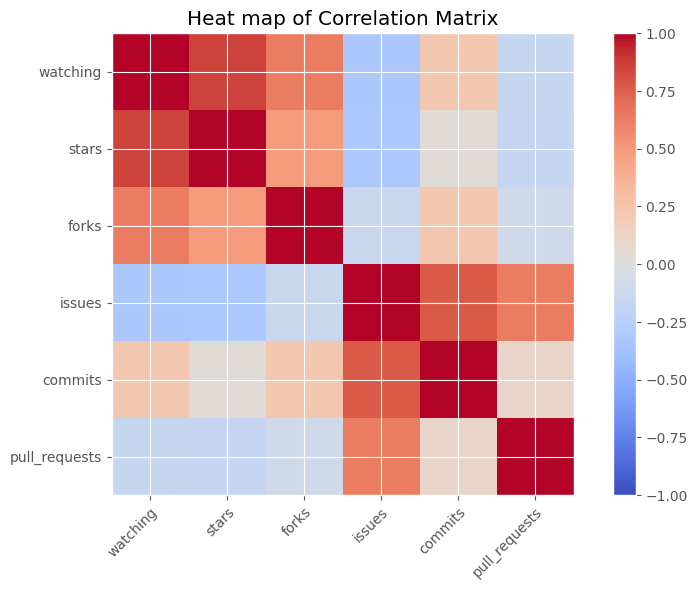

In [9]:
# your code goes here

#I changed the display settings to not do scientific notation
pd.options.display.float_format = '{:.2f}'.format

#overview using describe function
print(project_info.describe()) 


#correlation and heat map - using code from homework 5
#make correlation matrix
project_numeric = project_info.select_dtypes(include=['number'])
correlation_matrix = project_numeric.corr()

#make figure subplot
fig, ax = plt.subplots()

#use imshow to make the heatmap, choose coolwarm as the diverging color, on a scale from -1 to 1
im = ax.imshow(correlation_matrix, cmap = 'coolwarm', vmin = -1, vmax = 1)

#to make the labels I am going to add columns to a list
label = project_numeric.columns.tolist()

#set tickets to the labels and rotate for readability 
ax.set_xticks(range(len(label)), labels = label,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(label)), labels = label)

#add title
ax.set_title('Heat map of Correlation Matrix')

#add a color bar as a legend
fig.colorbar(im)


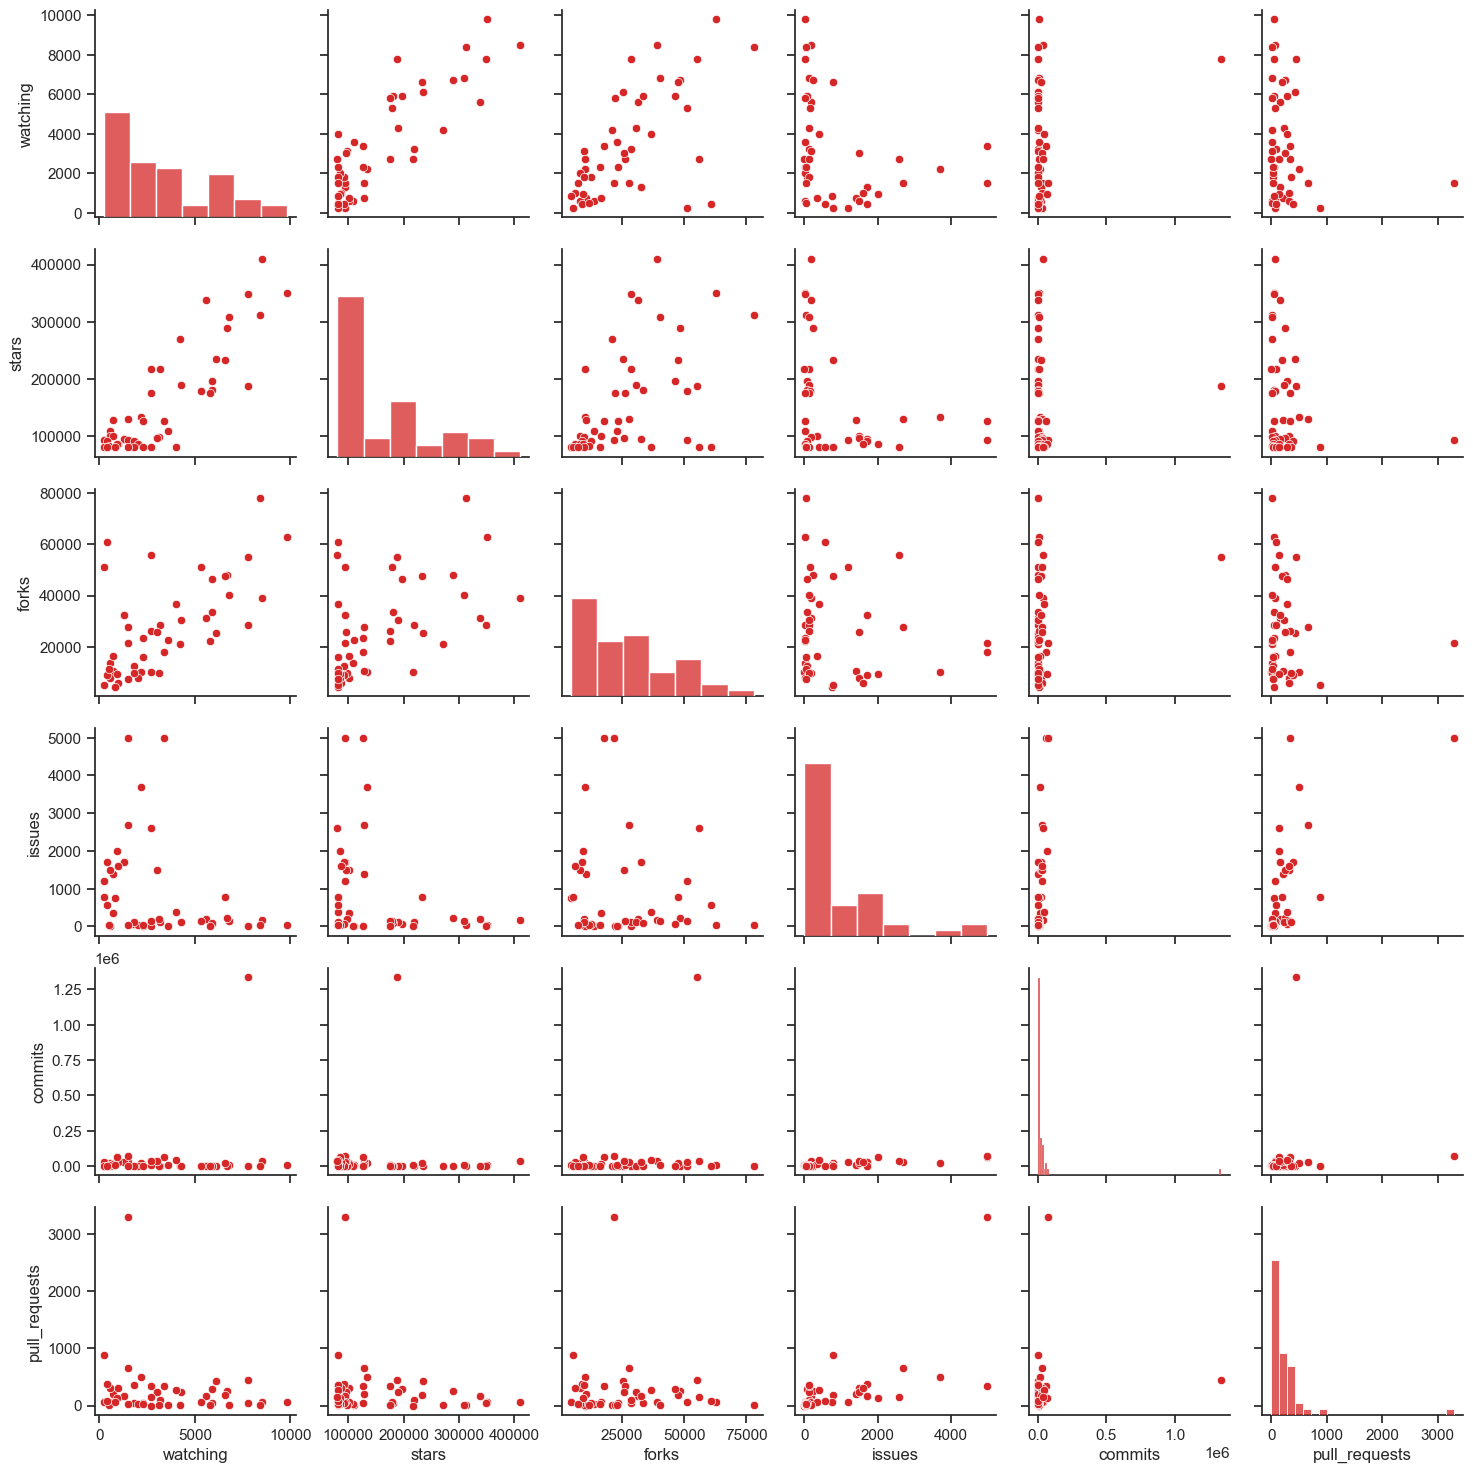

In [10]:
import seaborn as sns
#I referenced seaborn documentation for scatterplot matrix. I chose to change the color to this dark red
custom_red = "#D62728" 
sns.set_theme(style="ticks")
sns.pairplot(project_numeric,
             plot_kws={'color': custom_red},
             diag_kws={'color': custom_red})

**Your Interpretation:**   
The results from the correlation matrix and the scatterplot matrix are interesting. We see that watching, stars, and forks have strong correlations to one another, while having weak correlations to issues, commits, pull_requets.  
Issues has some correlation with commits and pull_requests.  
What is an interesting fact to find in the scatterplot matrix is that commits and pull_requests has an outlier that is probably pulling the correlation way down. The outlier is causing the distribution to lay flat so we can't see what the true distribution is without that outlier. While the other variables like watching, stars, and forks have a great ditribution with one another that seems to show an upward trend.

### 2.2. Linear regression

1. Use linear regression to try to predict the number of Stars based on Forks, Pull Requests, and Commits. Discuss the R-squared , F-statistic p-value, and coefficient  p-values. 
+ Develop another model which is better. Explain why it is better and interpret your results. Hint: try using other variables such as watching and/or Contributors. 

In [13]:
# your code goes here

#linear regression to predict stars
#stars and forks
#star_fork_ols = sm.ols(formula = 'stars ~ forks', data=project_numeric).fit()
#star_fork_ols.summary()

In [14]:
#linear regression to predict stars
#stars and pull_requests
#star_pull_ols = sm.ols(formula = 'stars ~ pull_requests', data=project_numeric).fit()
#star_pull_ols.summary()

In [16]:
#linear regression to predict stars
#stars and commits
#star_commits_ols = sm.ols(formula = 'stars ~ commits', data=project_numeric).fit()
#star_commits_ols.summary()

In [17]:
multi_star_ols = sm.ols(formula = 'stars ~ forks + pull_requests + commits', data=project_numeric).fit()
multi_star_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     5.166
Date:                Mon, 03 Mar 2025   Prob (F-statistic):            0.00380
Time:                        14:29:15   Log-Likelihood:                -608.18
No. Observations:                  48   AIC:                             1224.
Df Residuals:                      44   BIC:                             1232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.777e+04   2.25e+04      4.340      0.000    5.24e+04    1.43e+05
forks             2.4929      0.672      3.708      0.001       1.138       3.848
pull_requests   -20.4697     24.316     -0.842      0.404     -69.476      28.537
commits          -0.0356      0.063     -0.561      0.578      -0.163       0.092
==============================================================================
Omnibus:                        5.587   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.429
Skew:                           0.612   Prob(JB):                        0.109
Kurtosis:                       3.846   Cond. No.                     3.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Your Interpretation (part1):** 
When we put them all together to predict stars in a multilinear regression we got an R^2 value of .260, meaning that 26% of the variance of stars can be explained by these variables. We got a f-stat p-value of .0038, which means our model is statistically significant and that at least one of the variables is likely contributing significantly to the model.  
Our correlation coefficients are interesting. Forks has a correlation coefficient of 2.49, meaning for every increase of 1 unit of stars, forks is expected to increase by 2.49.  

Pull requests has a correlation coefficient of -20.47, meaning for every increase of 1 unit of stars, pull request is expected to decrease by 20.47.  

Commits has a correlation coefficient of -0.0356, meaning for every increase of 1 unit of stars, commits is expected to decrease by .0356.  

Forks has a p-value of .001, which means that it is significant variable in the model. With p-values of .404 and .578, pull requests and commits are not a significant variable in predicting stars and our model would be better if we take them out.


Before doing the linear regression I wanted to look at how Forks, Pull Requests, and Commits interacted with stars individually before putting them into a multilinear regression and seeing how they worked together at predicting stars. I commented out the code to save space but the work is there to check what I did. 
Forks had a R^2 0f .241 and correlation coef of 2.46.  
Pull requests had a R^2 of .027 and correlation coef of  -30.65. 
Commits had a R^2 of .001 and correlation coef of .0122. 

+ Develop another model which is better. Explain why it is better and interpret your results. Hint: try using other variables such as watching and/or Contributors.

In [32]:
multi_watchforks_ols = sm.ols(formula = 'stars ~ forks + watching', data=project_numeric).fit()
multi_watchforks_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           7.32e-14
Time:                        11:34:14   Log-Likelihood:                -583.16
No. Observations:                  48   AIC:                             1172.
Df Residuals:                      45   BIC:                             1178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.564e+04   1.27e+04      5.159      0.000       4e+04    9.13e+04
forks         -0.4039      0.491     -0.823      0.415      -1.392       0.584
watching      31.1923      3.363      9.275      0.000      24.419      37.966
==============================================================================
Omnibus:                        0.253   Durbin-Watson:                   1.452
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.277
Skew:                           0.158   Prob(JB):                        0.871
Kurtosis:                       2.802   Cond. No.                     6.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
final_multi_ols = sm.ols(formula = 'stars ~ forks + watching + issues', data=project_numeric).fit()
final_multi_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     46.76
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           2.69e-13
Time:                        14:45:51   Log-Likelihood:                -543.76
No. Observations:                  45   AIC:                             1096.
Df Residuals:                      41   BIC:                             1103.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.303e+04   1.43e+04      4.422      0.000    3.42e+04    9.18e+04
forks         -0.2177      0.477     -0.456      0.651      -1.182       0.746
watching      31.3433      3.491      8.978      0.000      24.293      38.394
issues        -2.5708      5.695     -0.451      0.654     -14.073       8.931
==============================================================================
Omnibus:                        0.252   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.243
Skew:                           0.157   Prob(JB):                        0.886
Kurtosis:                       2.824   Cond. No.                     6.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Your Interpretation (part 2):** 
I tried 2 different models to make it better than the last. In the first I tried adding watching to forks, the vairable that was significant in the last model, because these are the 2 variables that have correlation with watching in the correlation matrix heat map. Then after that I tried adding issues into the model with watching and forks.  

F&W model had an R^2 value of .739, meaning that 74% of the variance of stars can be explained by these variables. This is a huge improvement from the last model we created. We got a f-stat p-value of 7.32e-14 (very small), which means our model is statistically significant and that at least one of the variables is likely contributing significantly to the model.
Forks has a correlation coefficient of -.4, meaning for every increase of 1 unit of stars, forks is expected to decrease by .4.  Forks has a p-value of .415, which means that it is **not** a significant variable in the model. 
Watching has a correlation coefficient of 31.19, meaning for every increase of 1 unit of stars, watching is expected to increase by 31.19. Watching has a p-value of .0000, which means that it **is** a significant variable in the model. 

FW&I model had an R^2 value of .774, meaning that 77.4% of the variance of stars can be explained by these variables. This is an improvement from the F&W model. We got a f-stat p-value of 2.69e-13(very small), which means our model is statistically significant and that at least one of the variables is likely contributing significantly to the model.
Forks has a correlation coefficient of -.218, meaning for every increase of 1 unit of stars, forks is expected to decrease by .218. Forks has a p-value of .651, which means that it is **not** a significant variable in the model. 
Watching has a correlation coefficient of 31.34, meaning for every increase of 1 unit of stars, watching is expected to increase by 31.34. Watching has a p-value of .0000, which means that it **is** a significant variable in the model.
Issues has a correaltoin coefficient of -2.57, meaning for every increase of 1 unit of stars, issues is expected to decrease by 2.57. Issues has a p-value of .654, which means that it is **not** a significant variable in the model. 


What makes this model better is the **watching variable**, it is a very significant variable and seems to have a strong correlation with stars on github repositories. 

**Collaboration:** 

David Bean & I collaborated together on task 1.3.  

Mitchell Millerberg & I collaborated together on task 1.4.  

I used ChatGPT to help me understand and work through task 1.4., I wanted to understand what I was doing and learn thoroughly. I spent a lot of time on it and the code is mine. 